In [155]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [157]:
path = "data"
file_names = glob.glob(path + "/*.csv")
dfs = []

for filename in file_names:
    dfs.append(pd.read_csv(filename))

big_df = pd.concat(dfs, ignore_index = True)

df = big_df.drop(['DateTime', 'Altimeter Setting', 'One Hour Precipitation', 'Pressure', 'Three Hour Precipitation', 
                'Visibility', '24 Hour Precipitation', 'Relative Humidity', 'Gust', 'Direction', 'Six Hour Precipitation'],
                  axis=1)

# nan_counts = c_df.isna().sum()
# print(nan_counts)

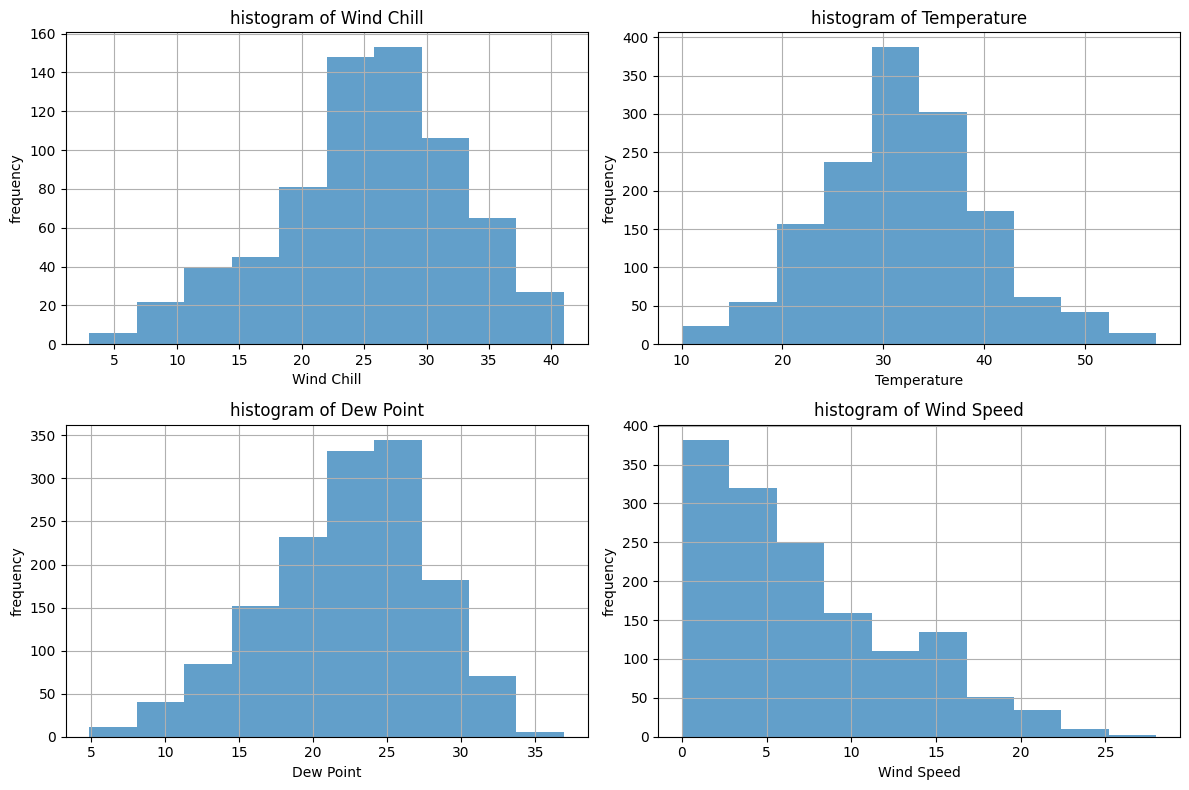

In [159]:
# distribution of feature values
plt.figure(figsize=(12,8))

for column in df.columns:
    plt.subplot(2,2, df.columns.get_loc(column) + 1)
    df[column].hist(bins=10, alpha=0.7)
    plt.title(f"histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("frequency")

plt.tight_layout()
plt.show()

In [161]:
# doing wind speed and temperature for now
df = df.drop(['Wind Chill', 'Dew Point'], axis=1)
df
nan_counts = df.isna().sum()
print(nan_counts)

Temperature    13086
Wind Speed     13086
dtype: int64


In [191]:
# starting with baseline model (cleaning NaNs)
df = df.dropna(axis=0, how = 'all')
# zero_wind_speed = df[df['Wind Speed'] == 0]
# zero_wind_speed

df["Temperature"] = df["Temperature"].fillna(df["Temperature"].mean()) # 32.02 = avg 
df["Wind Speed"] = df["Wind Speed"].dropna()
df

,Temperature,Wind Speed
11632,41.000000,NaN
11633,39.920000,NaN
11634,39.920000,NaN
11635,39.920000,NaN
11636,39.920000,NaN
...,...,...
14535,32.027607,5.0
14536,32.027607,8.0
14537,32.027607,6.0
14538,32.027607,7.0
